# Project Case Scenario


**Project Scenario:** You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. 
Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
df = pd.read_csv(boston_url)

# Descrição das variáveis do conjunto de dados:

- CRIM - taxa de criminalidade per capita por cidade

- ZN - proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés quadrados.

- INDUS - proporção de acres de negócios não varejistas por cidade.

- CHAS - Variável dummy do Charles River (1 se o trecho delimita o rio; 0 caso contrário)

- NOX - concentração de óxidos nítricos (partes por 10 milhões)

- RM - número médio de cômodos por residência

- AGE - proporção de unidades ocupadas por proprietários construídas antes de 1940

- DIS - distâncias ponderadas para cinco centros de emprego de Boston

- RAD - índice de acessibilidade a rodovias radiais

- TAX - taxa de imposto sobre propriedade de valor integral por US$ 10.000

- PTRATIO - proporção aluno-professor por cidade

- LSTAT - % de status inferior da população

- MEDV - Valor médio das casas ocupadas pelos proprietários em US$ 1.000,00

In [5]:
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
print(df.dtypes)

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object


In [7]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
# describe all the columns in "df" 
df.describe(include = "all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


# Task 4: Generate Descriptive Statistics and Visualizations

## For all visualizations, please include a title in each graph and appropriate labels

### Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable

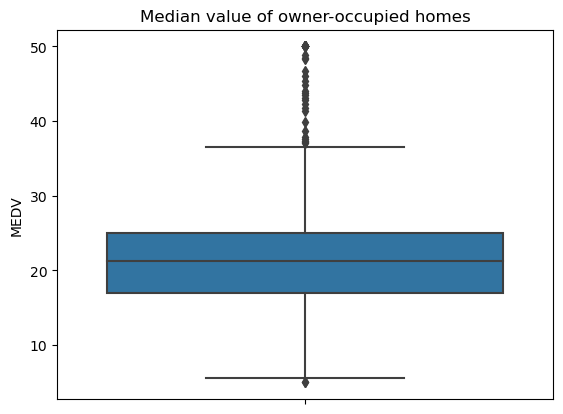

In [10]:
#BoxPlot para Median value of owner-occupied homes (MEDV):

ax = sns.boxplot(y = 'MEDV', data=df)
plt.title('Median value of owner-occupied homes')
plt.show()

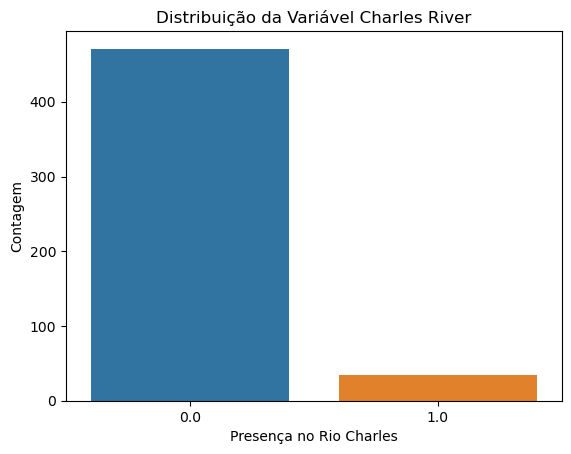

In [11]:
#barplot para a variável Charles river (CHAS)

ax = sns.countplot(x='CHAS', data=df)
plt.title('Distribuição da Variável Charles River')
plt.xlabel('Presença no Rio Charles')
plt.ylabel('Contagem')
plt.show()

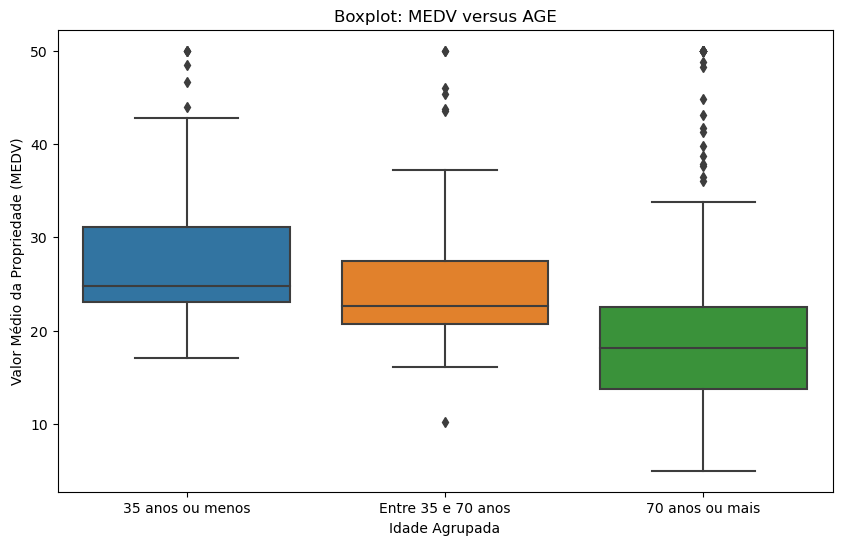

In [12]:
#Forneça um boxplot para a variável MEDV versus a variável AGE. (Discretize a variável idade em três grupos de 35 anos ou menos, entre 35 e 70 anos e 70 anos ou mais)

df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 anos ou menos', 'Entre 35 e 70 anos', '70 anos ou mais'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=df)

plt.title('Boxplot: MEDV versus AGE')
plt.xlabel('Idade Agrupada')
plt.ylabel('Valor Médio da Propriedade (MEDV)')

plt.show()

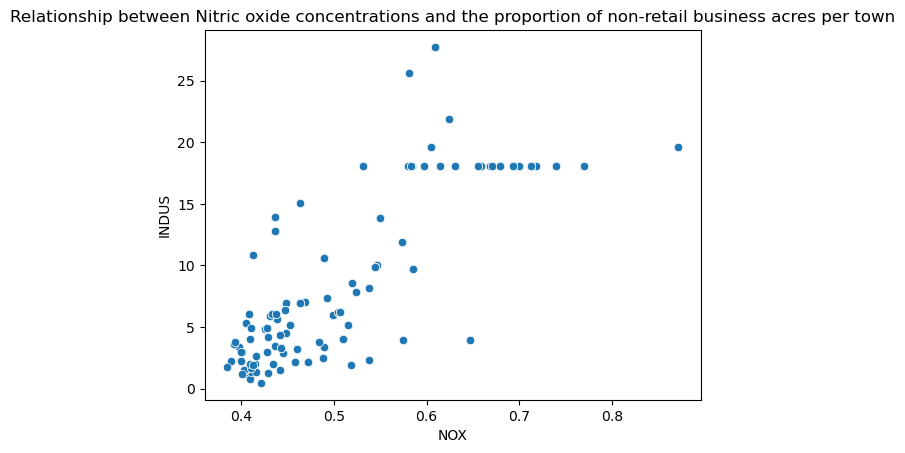

In [14]:
#Forneça um gráfico de dispersão para mostrar a relação entre as concentrações de óxido nítrico e a proporção de acres de negócios não varejistas por cidade. O que o senhor pode dizer sobre essa relação?
#NOX - concentração de óxidos nítricos (partes por 10 milhões)
#INDUS - proporção de acres de negócios não varejistas por cidade.

ax = sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

## Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

### There is a relationship between  Nitric oxide concentrations and the proportion of non-retail business acres per town.

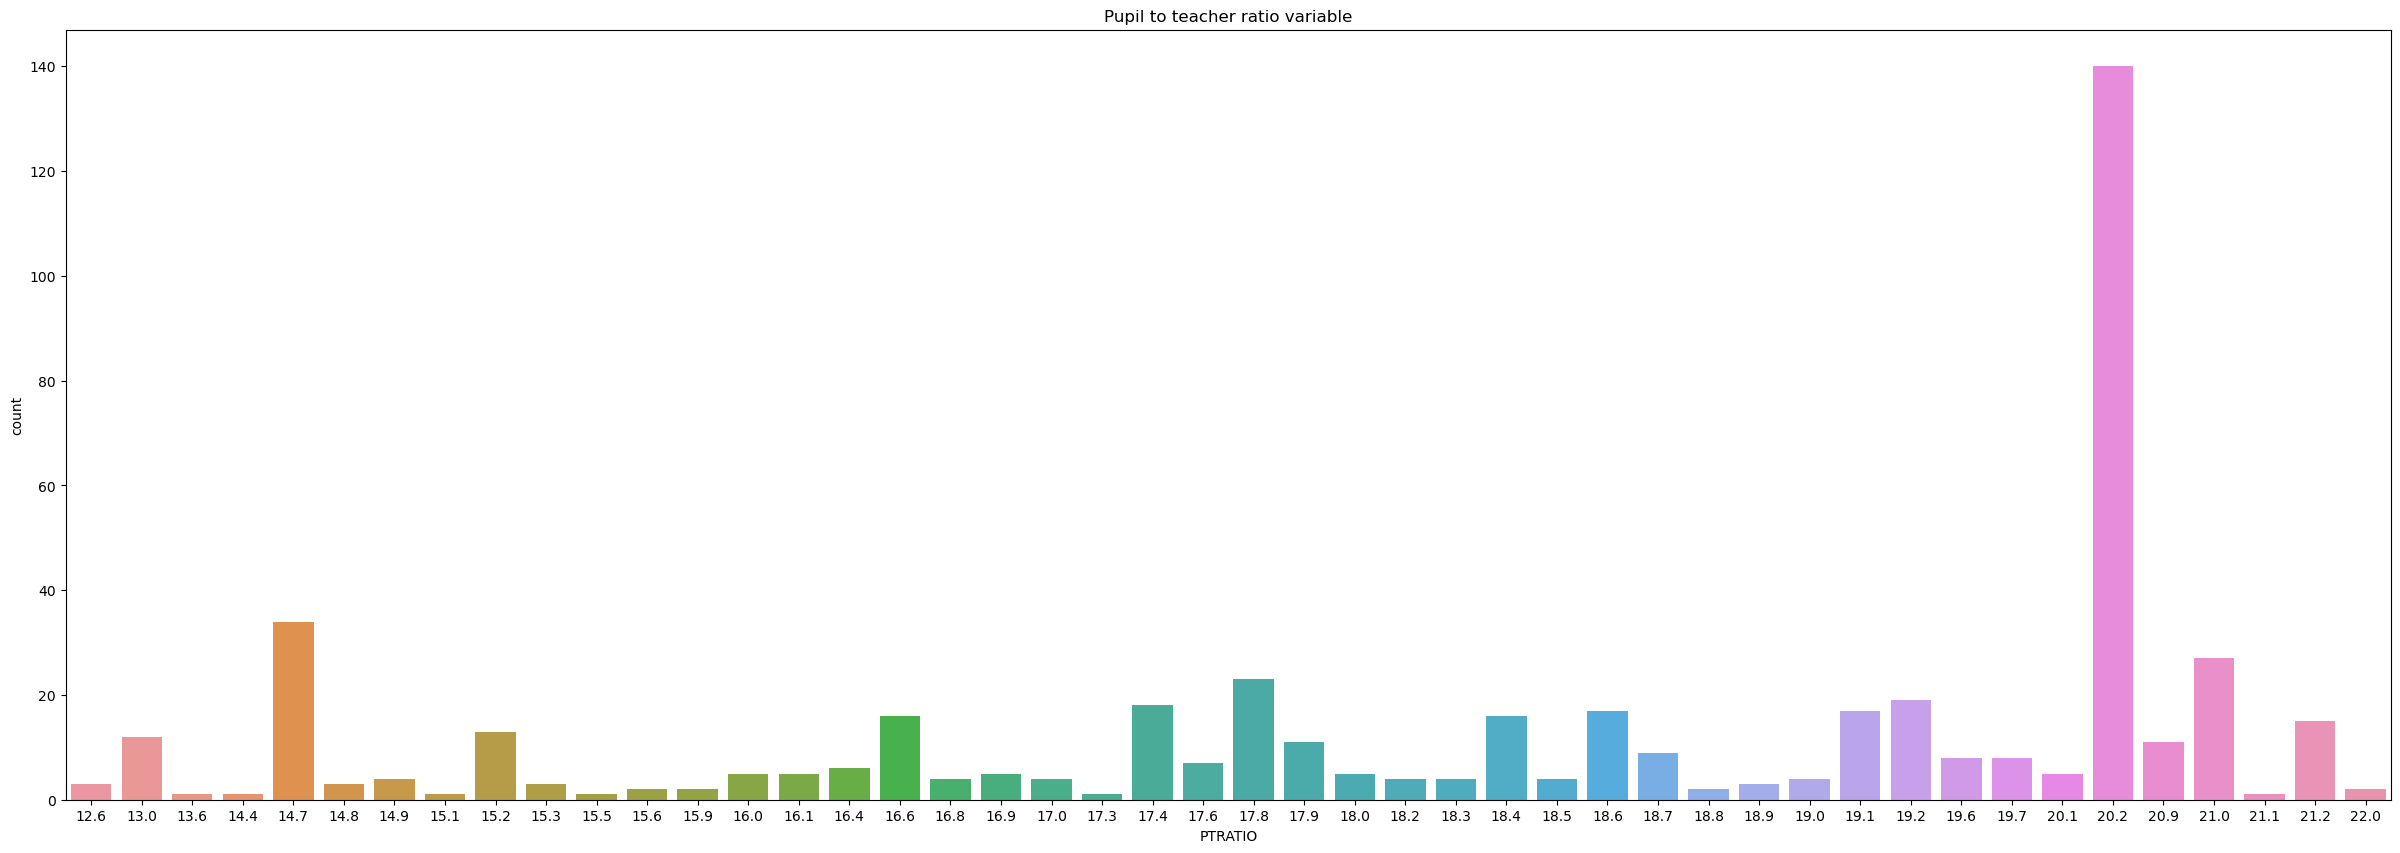

In [18]:
#Crie um histograma para a variável de proporção de alunos por professor
#PTRATIO - proporção aluno-professor por cidade

plt.figure(figsize=(30, 10))
sns.countplot(x='PTRATIO', data=df)
plt.title('Pupil to teacher ratio variable')
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions;

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


**Be sure to:**

* State your hypothesis.

* Use α = 0.05

* Perform the test Statistics.

* State the conclusion from the test.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### T-Test: Using the dados de uma agência habitacional em Boston, does CHAS  affect MEDV evaluation?

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group
*   One dependent continuous variable
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between CHAS and MEDV")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between CHAS and MEDV")

* α = 0.05

(-0.2, 1.2)

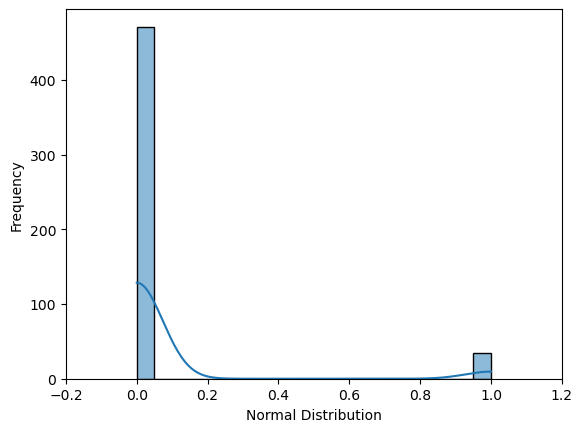

In [28]:
#CHAS - Variável dummy do Charles River (1 se o trecho delimita o rio; 0 caso contrário)

sns.histplot(df['CHAS'], bins=20, kde=True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

intervalo_x = [-0.2, 1.2]

plt.xlabel('Normal Distribution')  # Adiciona rótulo no eixo x
plt.ylabel('Frequency')            # Adiciona rótulo no eixo y
plt.xlim(intervalo_x)   

In [27]:
scipy.stats.ttest_ind(df[df['CHAS'] == 0]['MEDV'],
                   df[df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

## Is there a significant difference in the median value of houses bounded by the Charles river or not?

# Conclusion:

Test Statistic (statistic):
*  The test statistic value is -3.9964
*  If the test statistic is negative, it suggests that the mean of the first sample (group) is lower than the mean of the second sample.

P-value (pvalue):
*  The p-value is very low (0.0000739), indicating that the probability of observing such a large difference in means between the two samples (or more extreme) due to random chance is very low.

Conclusion:
*  Based on the low p-value, you would reject the null hypothesis.
*  There is statistically significant evidence to suggest that there is a significant difference in means between the two groups (samples).

Therefore, since the p-value is less than alpha value 0.05, the conclusion would be that there is a significant difference in means between the two samples, and you reject the null hypothesis in favor of the alternative hypothesis.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 $ (there is no difference in means)
*   $H\_1:µ\_1 ≠ µ\_2$ (there is a difference in means)

* α = 0.05

In [29]:
#AGE - proporção de unidades ocupadas por proprietários construídas antes de 1940
#MEDV - Valor médio das casas ocupadas pelos proprietários em US$ 1.000,00

df.loc[(df['AGE'] < 40), 'age_group'] = 'Befor 40 years'
df.loc[(df['AGE'] >= 40), 'age_group'] = 'After 40 years'

In [30]:
Befor_40 = df[df['age_group'] == 'Befor 40 years']['MEDV']
After_40 = df[df['age_group'] == 'After 40 years']['MEDV']

In [31]:
f_statistic, p_value = scipy.stats.f_oneway(Befor_40, After_40)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 43.203998973160836, P-Value: 1.233698302997076e-10


## Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis there is a statistical difference  the means differ, and you reject the null hypothesis in favor of the alternative hypothesis

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

tate the hypothesis:

*   $H\_0:$ NOX is not correlated with INDUS score
*   $H\_1:$ NOX evaluation score is correlated with INDUS score

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

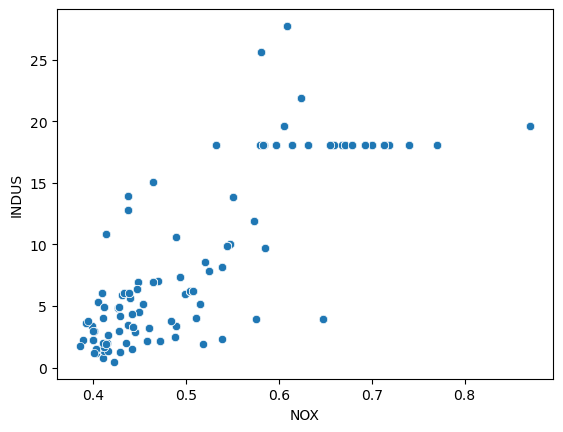

In [32]:
#NOX - concentração de óxidos nítricos (partes por 10 milhões)
#INDUS - proporção de acres de negócios não varejistas por cidade.

ax = sns.scatterplot(x="NOX", y="INDUS", data=df)

In [33]:
scipy.stats.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

**Conclusion**: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS score.

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

*   $H\_0:$ DIS is not correlated with MEDV score
*   $H\_1:$ DIS evaluation score is correlated with MEDV score

* α = 0.05

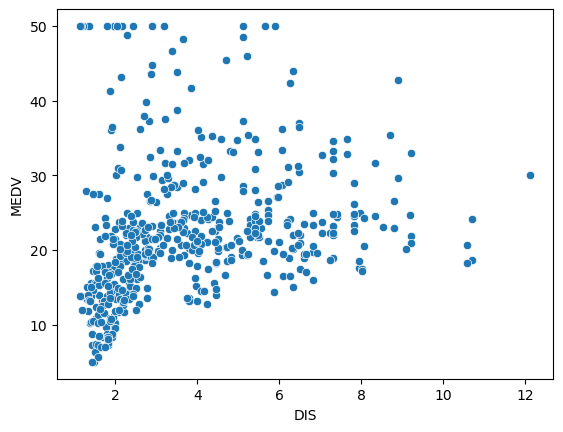

In [34]:
#DIS - distâncias ponderadas para cinco centros de emprego de Boston
#MEDV - Valor médio das casas ocupadas pelos proprietários em US$ 1.000,00

ax = sns.scatterplot(x="DIS", y="MEDV", data=df)

In [35]:
scipy.stats.pearsonr(df['DIS'], df['MEDV'])

PearsonRResult(statistic=0.24992873408590396, pvalue=1.2066117273371067e-08)

**Conclusion**: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between DIS and MEDV score.

## Regression Model

In [39]:
x = df['DIS']

y = df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        21:16:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

# Conclusion:

In summary, the weighted distance to employment centers in Boston has a statistically significant effect on the median value of owner-occupied homes, according to the model results. However, the low 2R2 value suggests that other factors not included in the model also influence home values. Additionally, the presence of autocorrelation in the residuals and deviations from normality indicate that the model may have limitations, and further exploration or consideration of other variables may be necessary.

# Task 6: Share your Jupyter Notebook.